In [1]:
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import SPSA
import numpy as np
import matplotlib.pyplot as plt

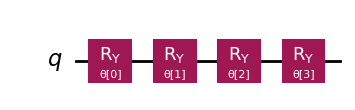

In [2]:
num_qubits = 1 
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = SLSQP(maxiter=100)
ansatz.decompose().draw("mpl")

In [3]:
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

/tmp/ipykernel_100031/2449948782.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [4]:
E1 = 0.0
E2 = 4.0

V11 = 3.0
V22 = -3.0
V12 = V21 = 0.2
lmbda = 1
"""
H0 = np.array([[E1, 0],
               [0, E2]])

HI = np.array([[V11, V12],
              [V21, V22]])

H2_op = H0 + lmbda * HI"""

'\nH0 = np.array([[E1, 0],\n               [0, E2]])\n\nHI = np.array([[V11, V12],\n              [V21, V22]])\n\nH2_op = H0 + lmbda * HI'

-3.999999729672904
-3.943999992027976
-3.8879999717868703
-3.831999859374686
-3.775999709362311
-3.7199999996443904
-3.663999860537911
-3.6079997231927057
-3.551999650380896
-3.495999954780667
-3.4399997399786537
-3.3839999793675575
-3.327999997733711
-3.2719999988571025
-3.2159999926665948
-3.1599999867143933
-3.1039995811252314
-3.0479999933105764
-2.9919999650933433
-2.9359998702109307
-2.8799999833154155
-2.823999930929009
-2.7679999898457868
-2.711999993011012
-2.655999988819246
-2.599999964286687
-2.5439999516772556
-2.4879997788511594
-2.431999749891045
-2.3759997106417465
-2.319999987586805
-2.263999993970093
-2.20799979721865
-2.1519999917266794
-2.0959999676072965
-2.039999994246781
-1.9839996684282255
-1.9279999994356027
-1.8719999392838702
-1.8159998548057001
-1.7599999781296793
-1.7039999618468589
-1.6479999992848628
-1.5919999594821457
-1.535999914554929
-1.4799999870918858
-1.4239999958997127
-1.3679996759796034
-1.3119999989439843
-1.2559999342448358
-1.199999870140782


/tmp/ipykernel_100031/2147617309.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


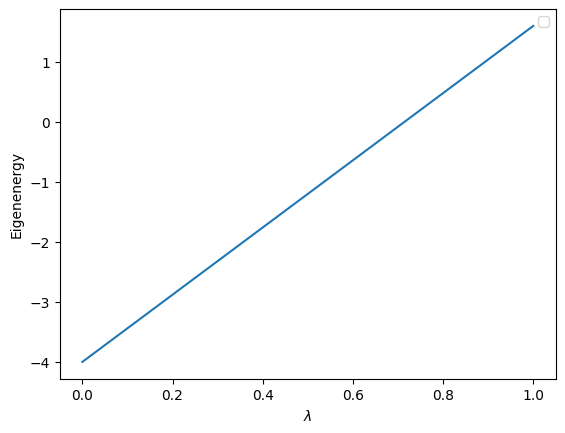

In [5]:
def problem_c() -> None:
    lambdas = np.linspace(0, 1, 101)

    lower_eig = []
    upper_eig = []

    for lmbda in lambdas:


                #Defining the coefficients for the Pauli terms. Have to do convert the Hamiltonian to a SparsePauliOp to use VQE.
        coefficients = [
            ("II", (lmbda*V11) + E1), 
            ("ZZ", (lmbda*V22) + E2),
            ("XX", lmbda*V12),
            ("YY", lmbda*V21),
        ]

        # Create the SparsePauliOp
        H2_op = SparsePauliOp.from_list(coefficients)

        minresult = vqe.compute_minimum_eigenvalue(H2_op)
        lower_eig.append(minresult.eigenvalue)
        print(minresult.eigenvalue)
     

    plt.plot(lambdas, lower_eig)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Eigenenergy")
    plt.legend()
    plt.show()

problem_c()